In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1: Re-implement PCA using Numpy




### Approach
- Subtract the mean from X
- Calculate Covariance matrix
- Calculate eigenvectors and eigenvalues of covariance matrix
- Sort the eigenvectors according to their eigenvalues in decreasing order
- Choose the first k eigenvectors and that will be the new k dimensions
- Transform the original n dimensional data points into k dimensions.
(= Projections with dot product.)

In [2]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # covariance matrix
        # covariance_matrix = (1 / np.shape(X)[0]) * np.diag(X.T.dot(X))
        covariance_matrix = np.cov(X.T)
        
        # eigenvectors, eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) 
        
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[idx]

        # keep first n eigenvectors
        self.components = eigenvectors[:self.n_components]

        return

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

# Problem 2:

In [6]:
from sklearn import datasets
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [16]:
set(data.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
X = data.data
y = data.target

# Project the data into the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_reduced = pca.transform(X)

print('Shape of X :', X.shape)
print('Shape of transformed X :', X_reduced.shape)

Shape of X : (1797, 64)
Shape of transformed X : (1797, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


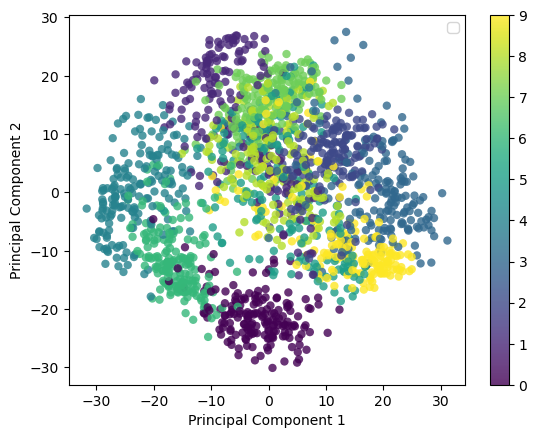

In [22]:
# Visulize the reduced dimension data
x1 = X_reduced[:,0]
x2 = X_reduced[:,1]

plt.scatter(x1,x2,
            c=y,edgecolors='none',alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar()
plt.show()